
## Wiwino market analysis

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Question 2: Which country should we prioritise and why?

In [2]:
# Import the csv file as pandas DataFrame
users = pd.read_csv("CSVs/question2.csv")

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            17 non-null     object
 1   users_count     17 non-null     int64 
 2   wines_count     17 non-null     int64 
 3   wineries_count  17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 676.0+ bytes


In [4]:
# Create a new column to store the number of users in million
users["users_count_million"] = np.round(users["users_count"]/1000000, 1)

In [5]:
# Keep only countries with at least one milion users
users = users[users["users_count"] >= 1000000]

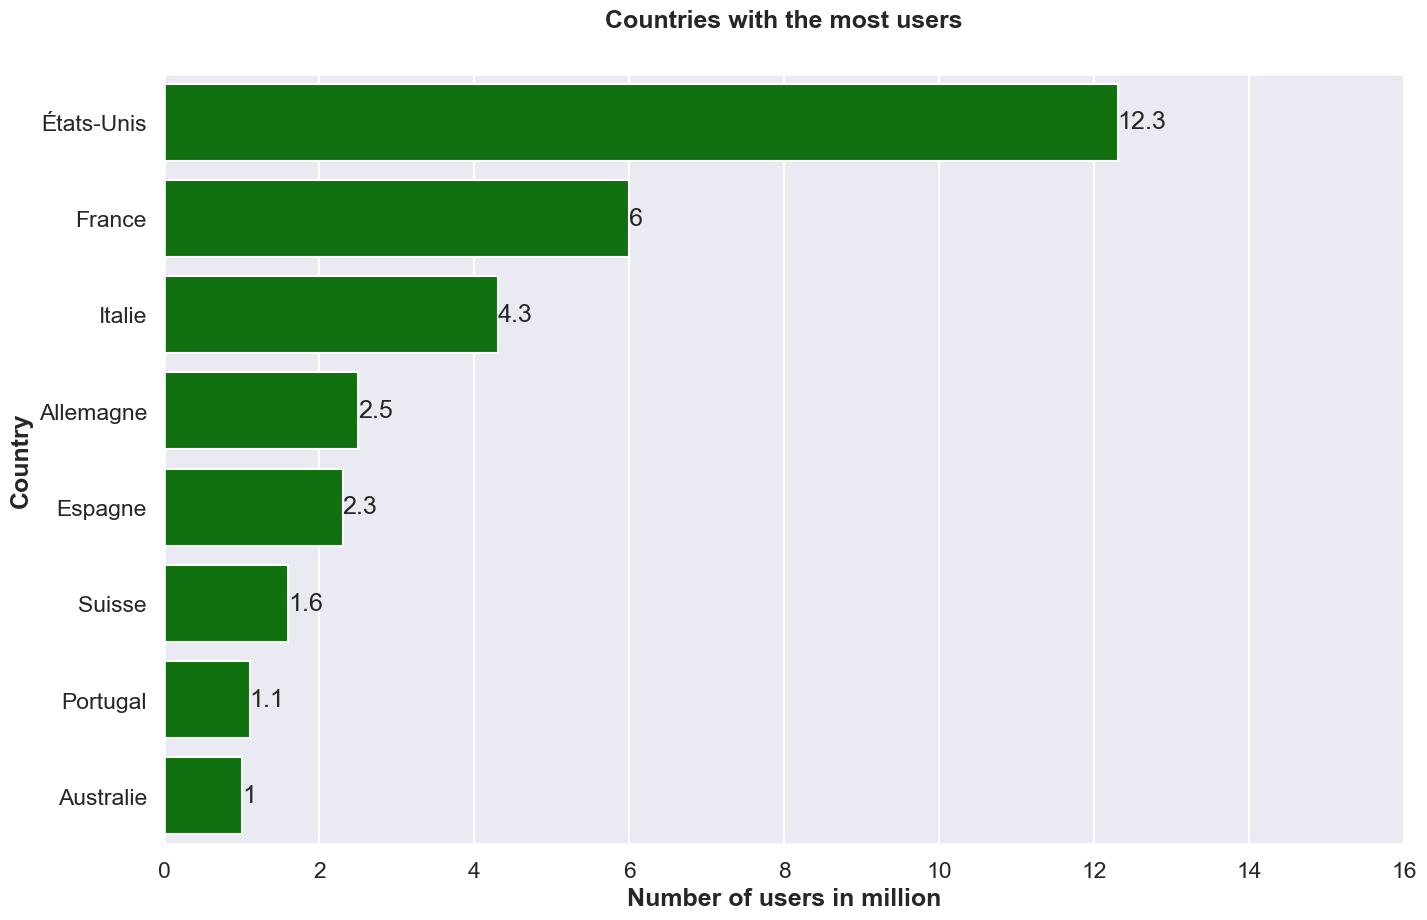

In [6]:
plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=users, x="users_count_million", y="name", orient="y", estimator="sum", errorbar=None, color="green")
ax.bar_label(ax.containers[0])
ax.set(xlim=(0, 16))

ax.set_xlabel("Number of users in million", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Country", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Countries with the most users", y=1.05, fontweight='bold')

plt.show()


#### Question 5:  What are the top 3 most common grapes worldwide ?

In [7]:
# Import the csv file as pandas DataFrame
grapes = pd.read_csv("CSVs/top_grapes.csv")

# Keep only the grapes used in more tha one country
grapes = grapes[grapes["countries_count"] > 1]

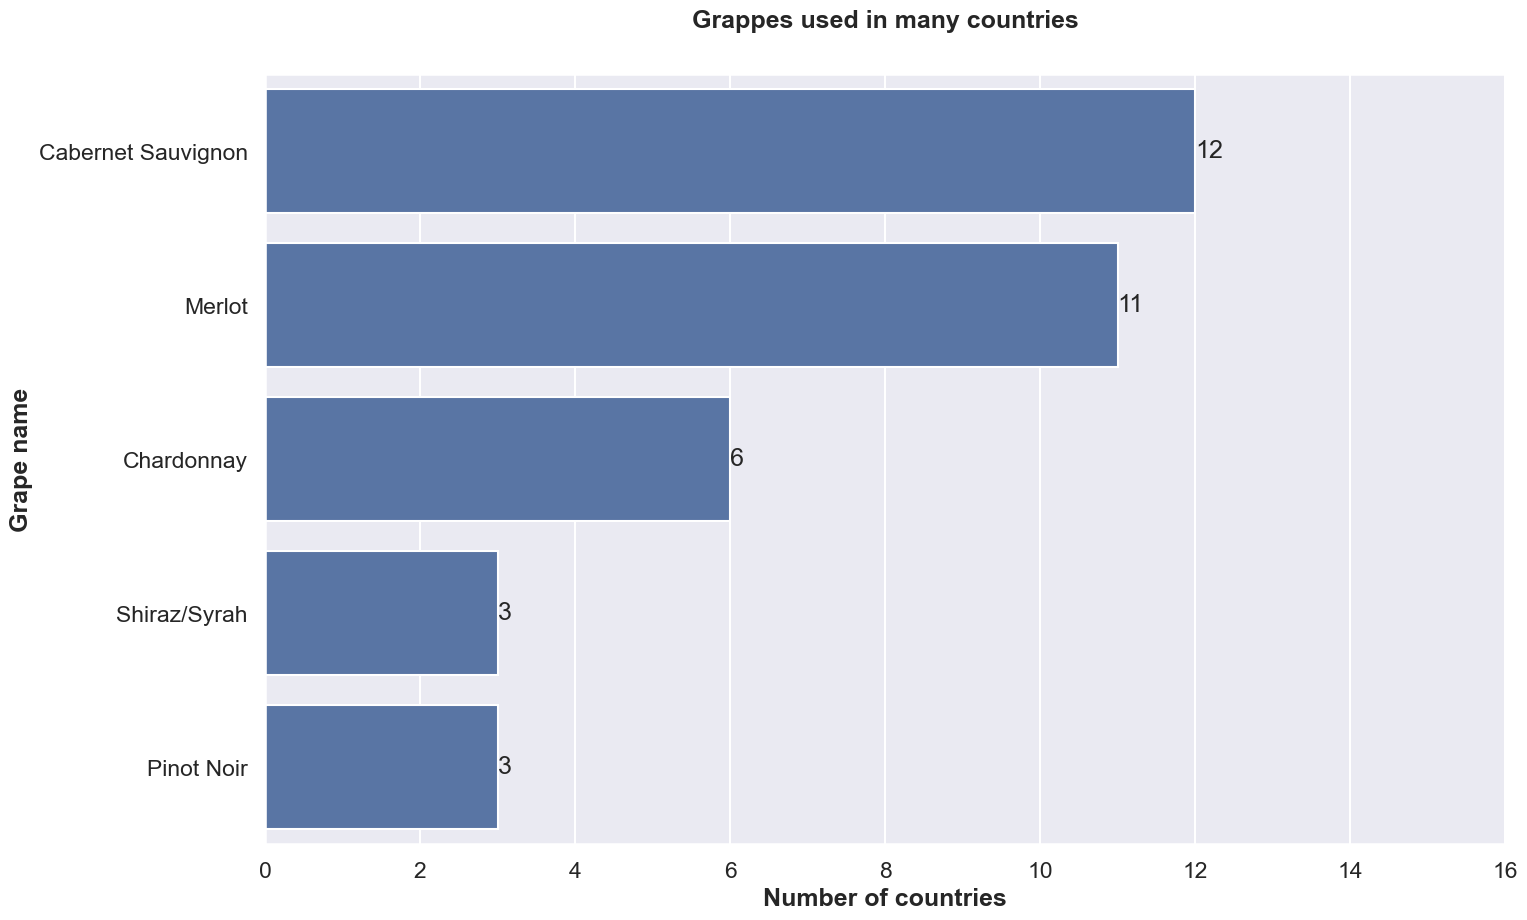

In [8]:
plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=grapes, x="countries_count", y="grape_name", orient="y", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0])
ax.set(xlim=(0, 16))

ax.set_xlabel("Number of countries", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Grape name", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Grappes used in many countries", y=1.05, fontweight='bold')

plt.show()


#### Question 5: What is the top 5 of the best rated wines for each of the three most used grapes?

In [9]:
# Import the csv file as pandas DataFrame
wines = pd.read_csv("CSVs/question5.csv")

# Add the year to the wine name to distinguish wines with the same name but from different vintages
wines["wine_name"] = wines["wine_name"].astype(str) + " " + wines["year"].astype(str)

In [10]:
# Get the top five wines of each grape

top5_cabernet = wines[wines["grape_name"] == "Cabernet Sauvignon"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

top5_chardonnay = wines[wines["grape_name"] == "Chardonnay"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

top5_merlot = wines[wines["grape_name"] == "Merlot"].sort_values(
                                by=["ratings_average", "ratings_count"], ascending=[False, False]).head(5)

# Concatenate these three DataFrames into one
top5_wines = pd.concat([top5_cabernet, top5_chardonnay, top5_merlot], ignore_index=True)

In [11]:
top5_wines

,wine_name,year,grape_name,ratings_average,ratings_count,region,country
0,Cabernet Sauvignon 2015,2015,Cabernet Sauvignon,4.8,2941,Rutherford,États-Unis
1,Special Selection Cabernet Sauvignon 1997,1997,Cabernet Sauvignon,4.7,41236,Napa Valley,États-Unis
2,Special Selection Cabernet Sauvignon 2017,2017,Cabernet Sauvignon,4.7,41236,Napa Valley,États-Unis
3,Cabernet Sauvignon 2019,2019,Cabernet Sauvignon,4.6,157944,Napa Valley,États-Unis
4,Cabernet Sauvignon (Signature) 2018,2018,Cabernet Sauvignon,4.6,13730,Napa Valley,États-Unis
5,Chloe Chardonnay 2020,2020,Chardonnay,4.5,458,Russian River Valley,États-Unis
6,Reserve Chardonnay 2021,2021,Chardonnay,4.5,396,Greyton,Afrique du Sud
7,Bentrock Vineyard Chardonnay 2019,2019,Chardonnay,4.5,118,Sta. Rita Hills,États-Unis
8,One Sixteen Chardonnay 2019,2019,Chardonnay,4.4,1753,Russian River Valley,États-Unis
9,Chardonnay 2015,2015,Chardonnay,4.4,1031,Western Cape,Afrique du Sud


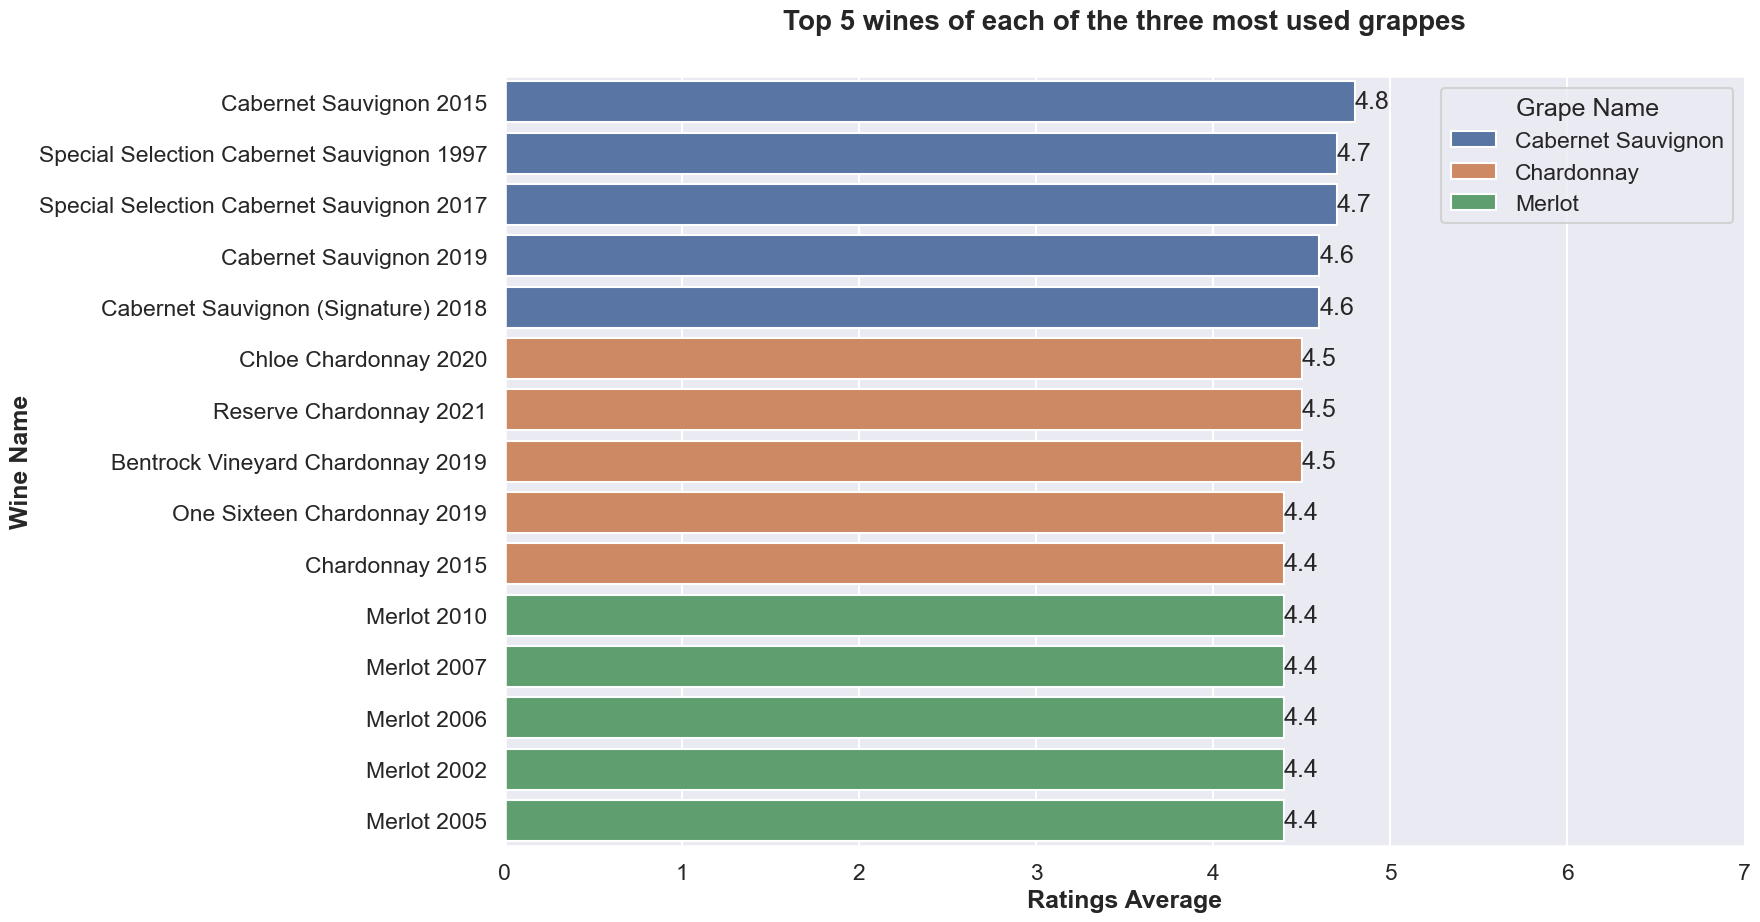

In [12]:
plt.figure(figsize=(16, 10))

sns.set_theme(style="darkgrid", context="talk")
sns.color_palette("Paired")

ax = sns.barplot(data=top5_wines, x="ratings_average", y="wine_name", orient="y",
                 hue="grape_name", errorbar=None, legend="brief")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.set(xlim=(0, 7))

ax.legend(title='Grape Name')
ax.set_xlabel("Ratings Average", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_ylabel("Wine Name", fontfamily='sans-serif', fontstyle='normal', fontweight='bold')
ax.set_title("Top 5 wines of each of the three most used grappes",
             y=1.05, fontweight='bold', fontsize=20)

plt.show()